In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
dataset_train=pd.read_csv("NSE-TATAGLOBAL.csv")

training_set=dataset_train.iloc[:, 1:2].values

In [69]:
dataset_train.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [71]:
dataset_train.shape

(2035, 8)

In [73]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_Scaled=sc.fit_transform(training_set)

In [75]:
training_set_Scaled.shape

(2035, 1)

In [91]:
X_train=[]
y_train=[]
for i in range(60,2035):
    X_train.append(training_set_Scaled[i-60:i,0])
    y_train.append(training_set_Scaled[i,0])

X_train, y_train=np.array(X_train), np.array(y_train)

In [93]:
dataset_train.shape

(2035, 8)

In [95]:
X_train.shape

(1975, 60)

In [97]:
#Reshape
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [99]:
X_train.shape

(1975, 60, 1)

In [101]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [103]:
input_shape=(X_train.shape[1],1)
input_shape

(60, 1)

In [105]:
regressor=Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

C:\Users\assma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [107]:
# add second layer od LSTM and Dropout
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

#add third layer od LSTM and Dropout
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

#add fourth layer od LSTM 
regressor.add(LSTM(units=50))
#regressor.add(Dropout(0.2))

In [109]:
#add output layer
regressor.add(Dense(units=1))

regressor.compile(optimizer='rmsprop', loss='mean_squared_error')
regressor.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 132ms/step - loss: 0.0229
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - loss: 0.0046
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 0.0033
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - loss: 0.0033
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - loss: 0.0027
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - loss: 0.0025
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - loss: 0.0024
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - loss: 0.0021
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - loss: 0.0022
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - loss: 0.0019


In [119]:
dataset_test=pd.read_csv("tatatest.csv")
real_stock_price=dataset_test.iloc[:, 1:2].values

In [121]:
dataset_test.shape

(248, 8)

In [123]:
real_stock_price

array([[308.05],
       [306.5 ],
       [305.5 ],
       [303.7 ],
       [301.  ],
       [302.25],
       [301.  ],
       [292.  ],
       [280.  ],
       [289.  ],
       [288.  ],
       [290.  ],
       [298.6 ],
       [290.  ],
       [287.55],
       [276.  ],
       [278.9 ],
       [279.4 ],
       [285.  ],
       [288.45],
       [278.9 ],
       [287.3 ],
       [277.  ],
       [277.5 ],
       [275.05],
       [273.15],
       [273.5 ],
       [275.9 ],
       [261.15],
       [252.25],
       [254.  ],
       [237.9 ],
       [234.7 ],
       [236.3 ],
       [240.7 ],
       [225.8 ],
       [226.  ],
       [235.  ],
       [224.9 ],
       [227.  ],
       [227.9 ],
       [226.95],
       [226.95],
       [225.  ],
       [211.3 ],
       [204.95],
       [211.  ],
       [204.  ],
       [205.5 ],
       [207.9 ],
       [211.45],
       [210.4 ],
       [210.3 ],
       [211.  ],
       [211.  ],
       [209.45],
       [209.5 ],
       [209.65],
       [210.  

In [125]:
#get the predicted stock
dataset_total=pd.concat((dataset_train['Open'], dataset_test['Open']),axis=0)
dataset_total

0      234.05
1      234.55
2      240.00
3      233.30
4      233.55
        ...  
243    125.40
244    124.75
245    125.00
246    122.80
247    122.80
Name: Open, Length: 2283, dtype: float64

In [129]:
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
len(inputs)

308

In [133]:
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
for i in range(60,308):
    X_test.append(inputs[i-60:i,0])


In [137]:
len(X_test)

248

In [145]:
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step


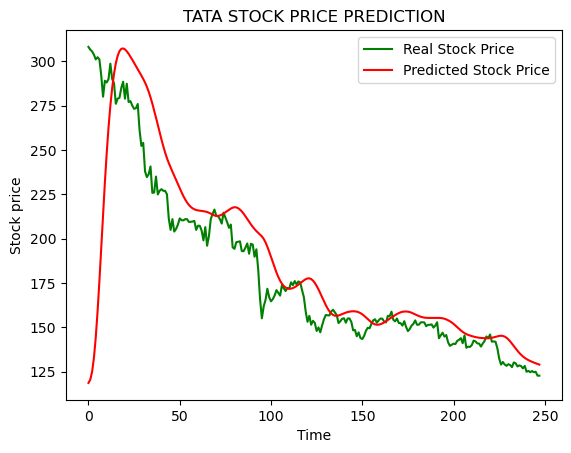

In [149]:
#visualising the results
plt.plot(real_stock_price, color='green', label='Real Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('TATA STOCK PRICE PREDICTION')
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.legend()
plt.show()